# Proyecto Etapa III: Implementación de Metaheurísticas

## 1. Descripción del Problema

### Formulación Matemática del CVRP

El **Problema de Ruteo de Vehículos con Capacidades (CVRP)** consiste en diseñar rutas óptimas para una flota homogénea de vehículos que parte de un depósito común y debe atender un conjunto de clientes con demandas específicas, minimizando la distancia total recorrida, sin exceder la capacidad ni autonomía de los vehículos.

> Nota: En cumplimiento con los lineamientos del proyecto, la instancia considera una flota **homogénea** de vehículos, es decir, todos los vehículos tienen la misma capacidad y autonomía.

#### Modelo base:

- **Conjuntos:**
  - $N = \{0, 1, ..., n\}$: conjunto de nodos, donde 0 representa el depósito.
  - $V = \{1, ..., m\}$: conjunto de vehículos.

- **Parámetros:**
  - $d_i$: demanda del cliente $i$.
  - $Q_k$: capacidad del vehículo $k$.
  - $R_k$: autonomía del vehículo $k$.
  - $c_{ij}$: distancia o costo entre nodo $i$ y nodo $j$.

- **Variables de decisión:**
  - $x_{ijk} \in \{0,1\}$: 1 si el vehículo $k$ viaja de $i$ a $j$, 0 en caso contrario.
  - $u_{ik} \in \mathbb{Z}$: orden de visita del nodo $i$ por el vehículo $k$ (para eliminación de subciclos).

#### Función objetivo:

Minimizar el costo total de transporte:
$$
\min \sum_{k \in V} \sum_{i \in N} \sum_{j \in N, j \neq i} c_{ij} \cdot x_{ijk}
$$

#### Restricciones:

1. Cada cliente es atendido exactamente una vez por un único vehículo.
2. Cada vehículo parte y regresa al depósito.
3. Conservación de flujo en cada nodo.
4. Capacidad máxima no excedida por cada vehículo.
5. Autonomía máxima no excedida por cada vehículo.
6. Eliminación de subciclos (MTZ).

---

## 2. Características de la Instancia Base

- **Ubicación geográfica:** Un depósito nacional y 24 municipios destino (25 nodos en total).
- **Datos de entrada:**
  - Demandas por municipio extraídas de `clients.csv`.
  - Coordenadas geográficas para cálculo de distancias.
  - 8 vehículos con la misma capacidad y autonomía (`vehicles.csv`).
- **Distancias:** Calculadas con la fórmula de geodésica de `geopy.distance` entre cada par de nodos.
- **Formato:** Matriz de distancias completa y simétrica.

> Todas las rutas generadas por el algoritmo parten y terminan en el mismo depósito, como exige la definición del CVRP estándar.

---

## 3. Restricciones y Consideraciones

### Restricciones clave:

- **Capacidad:** Cada vehículo tiene una carga máxima en kilogramos.
- **Autonomía:** Cada vehículo tiene una autonomía limitada en kilómetros.
- **Demanda indivisible:** Cada cliente es atendido completamente por un solo vehículo.
- **Sin transferencia:** No hay intercambio de carga entre vehículos.
- **Ruta cerrada:** Cada vehículo inicia y termina su recorrido en el depósito.

### Consideraciones adicionales:

- Se usa penalización en la metaheurística para manejar sobrepaso de capacidad o autonomía.
- En el modelo exacto se garantiza cumplimiento estricto de restricciones.
- No se contemplan ventanas de tiempo ni múltiples depósitos en la instancia base.

---

## 4. Método Metaheurístico Implementado

Se implementó un **Algoritmo Genético (GA)** adaptado al problema de ruteo de vehículos con capacidades (CVRP), utilizando un único depósito. El método busca minimizar el costo total de transporte (distancia recorrida), respetando restricciones de capacidad y autonomía mediante un esquema de penalizaciones dentro de la función de aptitud.

Cada solución es representada como una lista de rutas, una por cada vehículo, y evoluciona mediante procesos de selección, cruce y mutación. La calidad de cada individuo se evalúa considerando:

- La distancia total recorrida.
- Penalizaciones por sobrecarga de vehículos.
- Penalizaciones por superar la autonomía máxima.
- Penalizaciones por rutas vacías (vehículos no utilizados).

El algoritmo incluye técnicas básicas de mejora local como 2-opt aleatorio en la fase de inicialización.

---

## 5. Representación de Soluciones y Operadores

### Representación:
- Una solución se representa como una lista de listas: una ruta por cada vehículo.
- Cada ruta contiene una secuencia de nodos visitados (sin incluir el depósito, que es implícito al inicio y fin de cada ruta).

### Operadores genéticos utilizados:

- **Inicialización aleatoria con balance parcial:** los clientes se reparten entre rutas de manera equitativa o aleatoria, asegurando diversidad.
- **Crossover (cruza):**
  - *Route Exchange Crossover*: intercambia rutas completas entre padres.
  - *Route Merge Crossover*: fusiona rutas parcialmente y redistribuye los clientes.
- **Mutación:**
  - *Swap Mutation*: intercambia dos nodos en una misma ruta.
  - *Insert Mutation*: mueve un nodo a otra posición.
  - *Inversion Mutation*: revierte un segmento de una ruta.
  - *Redistribution Mutation*: transfiere un nodo entre rutas diferentes.
- **Selección por torneo:** se escoge el mejor individuo entre un subconjunto aleatorio.
- **Elitismo:** se conservan los mejores individuos entre generaciones.

---

## 6. Calibración de Parámetros

Se realizó una calibración empírica de los hiperparámetros del algoritmo para mejorar el rendimiento en la instancia base. Se ajustaron los siguientes parámetros:

- **Tamaño de población:** 150
- **Número de generaciones:** 400
- **Tasa de mutación:** 0.2
- **Tasa de crossover:** 0.8
- **Porcentaje de elitismo:** 10%
- **Tamaño del torneo:** 5
- **Criterio de parada temprana:** sin mejora en 50 generaciones consecutivas

Para la calibración, se realizaron 10 ejecuciones por configuración, registrando el valor de la función objetivo y el tiempo de ejecución. El análisis de resultados permitió identificar la mejor configuración para maximizar la calidad de la solución en tiempos razonables.

---

## 7. Reproducibilidad mediante Semillas Aleatorias

Para garantizar la reproducibilidad de los resultados y evaluar la estabilidad del algoritmo, se realizaron **tres ejecuciones independientes por cada caso (Base, 2 y 3)** utilizando distintas semillas aleatorias:

- **Semillas utilizadas**: 42, 43 y 44.
- En cada ejecución se registraron: tiempo de ejecución, distancia total y porcentaje de demanda cubierta.
- Posteriormente se calcularon promedios y desviaciones estándar para evaluar la robustez del método.

Este procedimiento permite capturar la variabilidad inherente del algoritmo genético debido a sus componentes estocásticos.

---

## 8. Archivos de Verificación y Visualización

Para cada instancia (Caso Base, 2 y 3), se generaron:

- Archivos de verificación `verificacion_metaheuristica_GA_Caso_X.csv`, con información de rutas, demandas y distancias acumuladas.
- Archivos HTML con visualización geográfica de las rutas finales (`mapa_rutas_caso_X.html`), permitiendo comparar visualmente la cobertura y eficiencia de las rutas generadas por el GA.

---



### Implementación de un algoritmo metaheurístico para resolver el CVRP base

Generation 0: Best Fitness = 301.80, Current Best = 301.80, Time = 0.03s
Generation 10: Best Fitness = 230.16, Current Best = 230.16, Time = 0.33s
Generation 20: Best Fitness = 216.72, Current Best = 216.72, Time = 0.61s
Generation 30: Best Fitness = 206.75, Current Best = 206.75, Time = 0.98s
Generation 40: Best Fitness = 206.75, Current Best = 206.75, Time = 1.27s
Generation 50: Best Fitness = 203.98, Current Best = 203.98, Time = 1.57s
Generation 60: Best Fitness = 203.25, Current Best = 203.25, Time = 1.87s
Generation 70: Best Fitness = 202.90, Current Best = 202.90, Time = 2.15s
Generation 80: Best Fitness = 202.85, Current Best = 202.85, Time = 2.43s
Generation 90: Best Fitness = 202.85, Current Best = 202.85, Time = 2.71s
Generation 100: Best Fitness = 202.82, Current Best = 202.82, Time = 3.00s
Generation 110: Best Fitness = 202.72, Current Best = 202.72, Time = 3.33s
Generation 120: Best Fitness = 202.72, Current Best = 202.72, Time = 3.61s
Generation 130: Best Fitness = 202.7

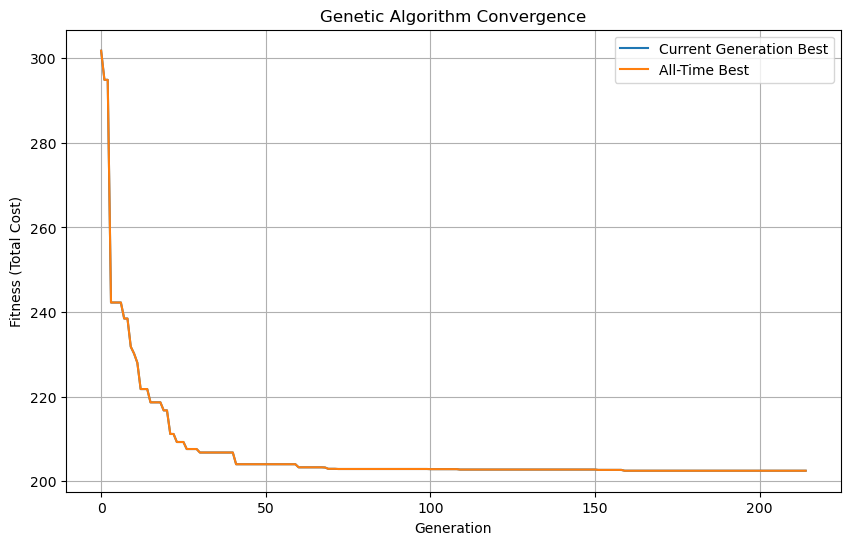

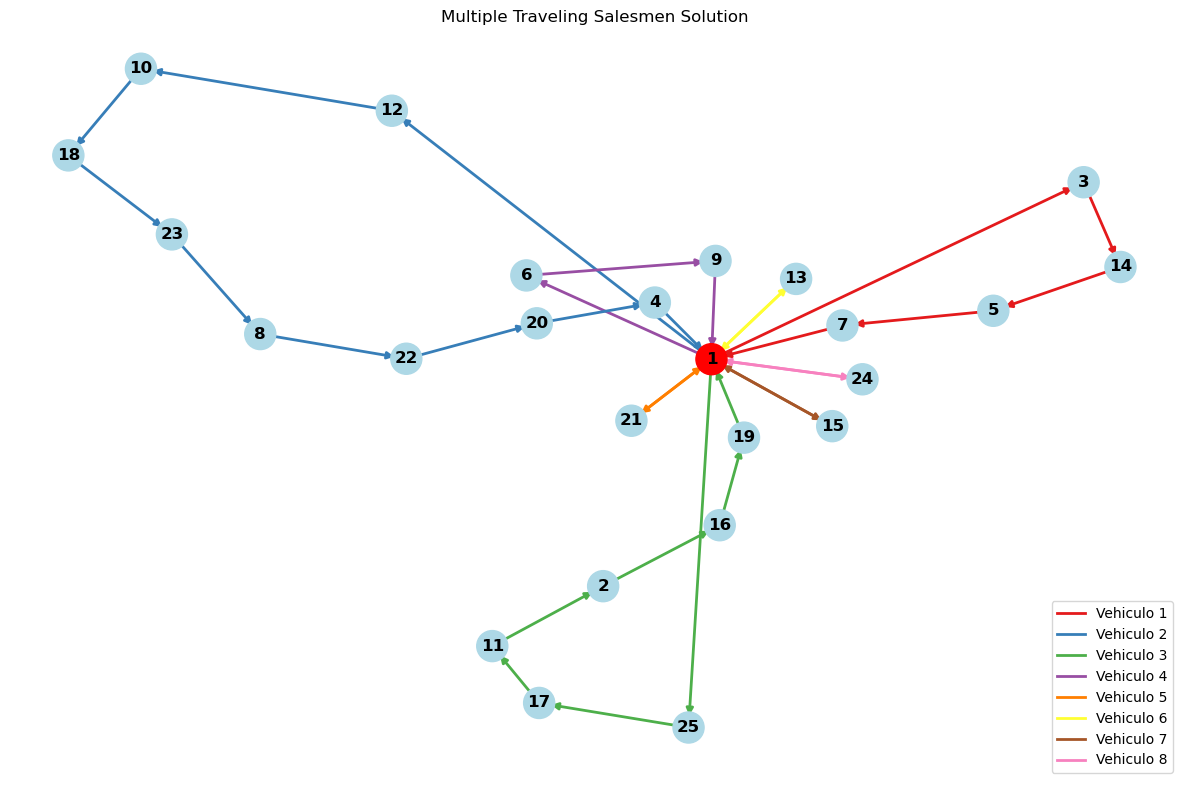

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import time
import csv
from collections import defaultdict
from copy import deepcopy
import pandas as pd
from memory_profiler import memory_usage


class GeneticAlgorithmMTSP:
    """
    Genetic Algorithm for Multiple Traveling Salesman Problem (MTSP) with multiple depots.
    
    This implementation uses advanced crossover and mutation operators specifically designed 
    for MTSP as recommended in academic literature.

    """
    
    def __init__(self, cost_matrix, num_cities, num_travelers=3, depots=None, 
                 population_size=100, generations=500, mutation_rate=0.2, 
                 crossover_rate=0.8, elitism_rate=0.1, tournament_size=5,
                  demanda=None, capacidades=None, autonomias=None):
        """
        Initialize the Genetic Algorithm solver.
        
        Args:
            cost_matrix (np.array): Square matrix of costs between cities
            num_cities (int): Total number of cities including depots
            num_travelers (int): Number of travelers/salesmen
            depots (list): List of depot indices (1-indexed), defaults to [1]
            population_size (int): Size of the population
            generations (int): Maximum number of generations
            mutation_rate (float): Probability of mutation
            crossover_rate (float): Probability of crossover
            elitism_rate (float): Proportion of elite solutions to keep
            tournament_size (int): Size of tournament for selection
        """
        self.cost_matrix = cost_matrix
        self.num_cities = num_cities
        self.num_travelers = num_travelers
        
        # Default to node 1 if no depots are specified (1-indexed)
        if depots is None:
            self.depots = [1]
        else:
            self.depots = depots
            
        # Create a set of non-depot cities (1-indexed)
        self.non_depots = [i for i in range(1, num_cities + 1) if i not in self.depots]
        
        # GA parameters
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.elitism_rate = elitism_rate
        self.tournament_size = tournament_size
        
        # Results storage
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_history = []
        self.best_solution_history = []
        self.population = []

        # Problem-specific parameters
        self.demanda = demanda if demanda else {}  # dict: {city_id (0-based): demand}
        self.capacidades = capacidades if capacidades else [float('inf')] * num_travelers
        self.autonomias = autonomias if autonomias else [float('inf')] * num_travelers

        
    def initialize_population(self):
        """
        Create an initial population of random solutions.
        
        Each solution is represented as a list of routes, one for each traveler.
        Each route is a sequence of cities (excluding the depot, which is implicit at start and end).
        """
        population = []
        
        for _ in range(self.population_size):
            # Create a random solution
            solution = self._create_random_solution()
            population.append(solution)
            
        self.population = population
        return population
    
    def _create_random_solution(self):
        """
        Create a random valid solution.
        
        Returns:
            List of routes, one per traveler. Each route is a list of cities.
        """
        # Make a copy of non-depot cities that need to be visited
        cities_to_visit = self.non_depots.copy()
        random.shuffle(cities_to_visit)
        
        # Partition the cities among travelers
        routes = [[] for _ in range(self.num_travelers)]
        
        # Two strategies: either distribute evenly or randomly
        if random.random() < 0.5:  # Distribute evenly
            cities_per_traveler = len(cities_to_visit) // self.num_travelers
            remainder = len(cities_to_visit) % self.num_travelers
            
            start_idx = 0
            for i in range(self.num_travelers):
                # Add one extra city to some travelers if there's a remainder
                extra = 1 if i < remainder else 0
                end_idx = start_idx + cities_per_traveler + extra
                routes[i] = cities_to_visit[start_idx:end_idx]
                start_idx = end_idx
        else:  # Distribute randomly but ensure each traveler has at least one city if possible
            min_cities = min(1, len(cities_to_visit) // self.num_travelers)
            
            # First, ensure minimum cities per traveler
            for i in range(self.num_travelers):
                if len(cities_to_visit) >= min_cities:
                    routes[i] = cities_to_visit[:min_cities]
                    cities_to_visit = cities_to_visit[min_cities:]
            
            # Then distribute remaining cities randomly
            while cities_to_visit:
                traveler_idx = random.randint(0, self.num_travelers - 1)
                routes[traveler_idx].append(cities_to_visit.pop(0))
        
        # Optimize each traveler's route with a random 2-opt improvement
        for i in range(self.num_travelers):
            if len(routes[i]) > 3:  # Only worth optimizing if route has enough cities
                routes[i] = self._random_2opt(routes[i])
                
        return routes
    
    def _random_2opt(self, route, iterations=5):
        """
        Apply a simple 2-opt local search to improve a single route.
        Only performs a few iterations to maintain diversity in the population.
        """
        best_route = route.copy()
        best_cost = self._route_cost(best_route)
        
        for _ in range(iterations):
            if len(route) < 4:
                break
                
            # Select random segment to reverse
            i, j = sorted(random.sample(range(len(route)), 2))
            
            # Apply 2-opt: reverse the segment between i and j
            new_route = best_route[:i] + best_route[i:j+1][::-1] + best_route[j+1:]
            new_cost = self._route_cost(new_route)
            
            if new_cost < best_cost:
                best_route = new_route
                best_cost = new_cost
                
        return best_route
    
    def _route_cost(self, route):
        """Calculate the cost of a single route including return to depot."""
        if not route:  # Empty route
            return 0
            
        # Default depot is the first one in the list
        depot = self.depots[0]
        
        # Start at depot, visit all cities in route, return to depot
        cost = self.cost_matrix[depot-1][route[0]-1]  # From depot to first city
        
        for i in range(len(route) - 1):
            cost += self.cost_matrix[route[i]-1][route[i+1]-1]
            
        cost += self.cost_matrix[route[-1]-1][depot-1]  # Return to depot
        return cost
    
    def evaluate_fitness(self, solution): # modificar para añadir las nuevas restricciones: capacidad, autonomía 
        """Calculate the fitness (total cost) of a solution. Also applies penalties for violations.
        Penalties are applied for:
        1. Not using all vehicles (empty routes)
        2. Exceeding vehicle capacity
        3. Exceeding vehicle autonomy
        """
        total_cost = 0
        
        for k, route in enumerate(solution):
            total_cost += self._route_cost(route)

            # Penalize solutions that do not use all vehicles
            if not route:
                total_cost += 1e6  # Large penalty for empty route

            # Penalize solutions that exceed vehicle capacity
            carga = sum(self.demanda.get(city-1, 0) for city in route)
            if carga > self.capacidades[k]:
                penalized_cost = 1e6 * (carga - self.capacidades[k])
                total_cost += penalized_cost

            # Penalize solutions that exceed vehicle autonomy
            distancia = self._route_cost(route)
            if distancia > self.autonomias[k]:
                penalized_cost = 1e6 * (distancia - self.autonomias[k])
                total_cost += penalized_cost

        return total_cost
    
    def select_parents(self):
        """
        Select parents using tournament selection.
        
        Returns:
            Two parent solutions
        """
        def tournament():
            participants = random.sample(range(len(self.population)), self.tournament_size)
            participants_fitness = [(p, self.evaluate_fitness(self.population[p])) for p in participants]
            winner = min(participants_fitness, key=lambda x: x[1])[0]
            return self.population[winner]
        
        parent1 = tournament()
        parent2 = tournament()
        return parent1, parent2
    
    def crossover(self, parent1, parent2):
        """
        Perform crossover between two parents.
        
        This uses a specialized route-based crossover operator for MTSP:
        1. Route Exchange Crossover - exchanges whole routes between parents
        2. Route Merge Crossover - merges routes between parents and redistributes cities
        
        Returns:
            Two child solutions
        """
        if random.random() > self.crossover_rate:
            return deepcopy(parent1), deepcopy(parent2)
        
        # Choose crossover type: route exchange or route merge
        if random.random() < 0.5:
            return self._route_exchange_crossover(parent1, parent2)
        else:
            return self._route_merge_crossover(parent1, parent2)
    
    def _route_exchange_crossover(self, parent1, parent2):
        """
        Route Exchange Crossover: exchanges complete routes between parents.
        
        This preserves good routes while creating new combinations.
        """
        child1 = deepcopy(parent1)
        child2 = deepcopy(parent2)
        
        if self.num_travelers < 2:
            return child1, child2
            
        # Select random routes to exchange
        num_routes_to_exchange = random.randint(1, max(1, self.num_travelers // 2))
        routes_to_exchange = random.sample(range(self.num_travelers), num_routes_to_exchange)
        
        # Exchange the selected routes
        for route_idx in routes_to_exchange:
            child1[route_idx], child2[route_idx] = child2[route_idx], child1[route_idx]
            
        # Repair solutions if needed (check for duplicates and missing cities)
        child1 = self._repair_solution(child1)
        child2 = self._repair_solution(child2)
        
        return child1, child2
    
    def _route_merge_crossover(self, parent1, parent2):
        """
        Route Merge Crossover: merges corresponding routes, then rebuilds a valid solution.
        
        This combines parts of routes from both parents, creating more genetic diversity.
        """
        # Collect all cities from both parents (excluding depots)
        all_cities = set(self.non_depots)
        
        # Create empty routes for children
        child1 = [[] for _ in range(self.num_travelers)]
        child2 = [[] for _ in range(self.num_travelers)]
        
        # For each traveler's route
        for i in range(self.num_travelers):
            # Choose crossover points for both parents' routes
            if parent1[i] and parent2[i]:
                # Get crossover points
                p1_cross = random.randint(0, len(parent1[i]))
                p2_cross = random.randint(0, len(parent2[i]))
                
                # Create merged routes (may contain duplicates)
                merged1 = parent1[i][:p1_cross] + parent2[i][p2_cross:]
                merged2 = parent2[i][:p2_cross] + parent1[i][p1_cross:]
                
                # Keep only the first occurrence of each city
                child1[i] = self._remove_duplicates(merged1)
                child2[i] = self._remove_duplicates(merged2)
        
        # Repair solutions to ensure all cities are covered
        child1 = self._repair_solution(child1)
        child2 = self._repair_solution(child2)
        
        return child1, child2
    
    def _remove_duplicates(self, route):
        """Remove duplicate cities from a route, keeping the first occurrence."""
        seen = set()
        result = []
        for city in route:
            if city not in seen:
                seen.add(city)
                result.append(city)
        return result
    
    def _repair_solution(self, solution):
        """
        Repair a solution to ensure all cities are visited exactly once.
        
        1. Find missing cities (cities that should be visited but aren't in any route)
        2. Find duplicate cities (cities that appear in multiple routes)
        3. Remove duplicates and add missing cities
        """
        # Get all cities in the solution
        included_cities = []
        for route in solution:
            included_cities.extend(route)
            
        # Find duplicate cities and their positions
        city_counts = defaultdict(list)
        for traveler_idx, route in enumerate(solution):
            for pos, city in enumerate(route):
                city_counts[city].append((traveler_idx, pos))
                
        # Extract duplicate cities (appearing more than once) and missing cities
        duplicate_cities = {city: positions for city, positions in city_counts.items() 
                           if len(positions) > 1}
        missing_cities = [city for city in self.non_depots if city not in included_cities]
        
        # Process duplicates by keeping the first occurrence and marking others for removal
        to_remove = []
        for city, positions in duplicate_cities.items():
            # Keep the first occurrence, mark others for removal
            for traveler_idx, pos in positions[1:]:
                to_remove.append((traveler_idx, pos))
        
        # Sort removals in reverse order (to maintain valid indices when removing)
        to_remove.sort(reverse=True)
        
        # Remove duplicates
        for traveler_idx, pos in to_remove:
            solution[traveler_idx].pop(pos)
        
        # Distribute missing cities to routes
        random.shuffle(missing_cities)
        for city in missing_cities:
            # Choose a route, preferring those with fewer cities for balance
            route_sizes = [(i, len(route)) for i, route in enumerate(solution)]
            route_idx = min(route_sizes, key=lambda x: x[1])[0]
            
            # Insert at a random position
            insert_pos = random.randint(0, len(solution[route_idx]))
            solution[route_idx].insert(insert_pos, city)
        
        return solution
    
    def mutate(self, solution):
        """
        Apply mutation operators to the solution.
        
        Uses several mutation types:
        1. Swap mutation - swaps cities within a route
        2. Insert mutation - moves a city to a different position
        3. Inversion mutation - reverses a segment of a route
        4. Redistribution mutation - moves cities between routes
        
        Returns:
            Mutated solution
        """
        if random.random() > self.mutation_rate:
            return solution
            
        # Choose mutation type
        mutation_type = random.choice(['swap', 'insert', 'invert', 'redistribute'])
        
        if mutation_type == 'swap':
            return self._swap_mutation(solution)
        elif mutation_type == 'insert':
            return self._insert_mutation(solution)
        elif mutation_type == 'invert':
            return self._inversion_mutation(solution)
        else:  # redistribute
            return self._redistribution_mutation(solution)
    
    def _swap_mutation(self, solution):
        """Swap two random cities within a random route."""
        mutated = deepcopy(solution)
        
        # Select a non-empty route
        non_empty_routes = [i for i, route in enumerate(mutated) if len(route) >= 2]
        if not non_empty_routes:
            return mutated
            
        route_idx = random.choice(non_empty_routes)
        route = mutated[route_idx]
        
        # Swap two random positions
        pos1, pos2 = random.sample(range(len(route)), 2)
        route[pos1], route[pos2] = route[pos2], route[pos1]
        
        return mutated
    
    def _insert_mutation(self, solution):
        """Move a random city to a different position in its route."""
        mutated = deepcopy(solution)
        
        # Select a non-empty route
        non_empty_routes = [i for i, route in enumerate(mutated) if len(route) >= 2]
        if not non_empty_routes:
            return mutated
            
        route_idx = random.choice(non_empty_routes)
        route = mutated[route_idx]
        
        # Select a city and a new position
        old_pos = random.randint(0, len(route) - 1)
        new_pos = random.randint(0, len(route) - 1)
        while new_pos == old_pos:
            new_pos = random.randint(0, len(route) - 1)
            
        # Remove city from old position and insert at new position
        city = route.pop(old_pos)
        route.insert(new_pos, city)
        
        return mutated
    
    def _inversion_mutation(self, solution):
        """Reverse a segment of a random route."""
        mutated = deepcopy(solution)
        
        # Select a route with enough cities
        eligible_routes = [i for i, route in enumerate(mutated) if len(route) >= 3]
        if not eligible_routes:
            return mutated
            
        route_idx = random.choice(eligible_routes)
        route = mutated[route_idx]
        
        # Select two positions and reverse the segment between them
        pos1, pos2 = sorted(random.sample(range(len(route)), 2))
        mutated[route_idx] = route[:pos1] + route[pos1:pos2+1][::-1] + route[pos2+1:]
        
        return mutated
    
    def _redistribution_mutation(self, solution):
        """Move a city from one route to another."""
        mutated = deepcopy(solution)
        
        if self.num_travelers < 2:
            return mutated
            
        # Find a non-empty route to take a city from
        non_empty_routes = [i for i, route in enumerate(mutated) if route]
        if not non_empty_routes:
            return mutated
            
        from_route_idx = random.choice(non_empty_routes)
        to_route_idx = random.randint(0, self.num_travelers - 1)
        while to_route_idx == from_route_idx:
            to_route_idx = random.randint(0, self.num_travelers - 1)
            
        # Move a random city from one route to another
        if mutated[from_route_idx]:
            city_pos = random.randint(0, len(mutated[from_route_idx]) - 1)
            city = mutated[from_route_idx].pop(city_pos)
            
            insert_pos = random.randint(0, len(mutated[to_route_idx]))
            mutated[to_route_idx].insert(insert_pos, city)
            
        return mutated
    
    def evolve_population(self):
        """
        Evolve the population to the next generation using elitism, crossover, and mutation.
        """
        # Evaluate current population
        population_fitness = [(i, self.evaluate_fitness(solution)) 
                              for i, solution in enumerate(self.population)]
        
        # Sort by fitness (lower is better)
        population_fitness.sort(key=lambda x: x[1])
        
        # Keep elite solutions
        num_elite = max(1, int(self.elitism_rate * self.population_size))
        elite_indices = [idx for idx, _ in population_fitness[:num_elite]]
        new_population = [deepcopy(self.population[idx]) for idx in elite_indices]
        
        # Fill the rest of the population with offspring
        while len(new_population) < self.population_size:
            # Select parents
            parent1, parent2 = self.select_parents()
            
            # Crossover
            child1, child2 = self.crossover(parent1, parent2)
            
            # Mutation
            child1 = self.mutate(child1)
            child2 = self.mutate(child2)
            
            # Add to new population
            new_population.append(child1)
            if len(new_population) < self.population_size:
                new_population.append(child2)
        
        self.population = new_population
    
    def solve(self, verbose=True, early_stopping_generations=50):
        """
        Run the genetic algorithm to solve the MTSP.
        
        Args:
            verbose (bool): Whether to print progress information
            early_stopping_generations (int): Stop if no improvement for this many generations
            
        Returns:
            best_solution, best_fitness
        """
        # Initialize population
        self.initialize_population()
        
        # Track best solution and convergence
        best_solution = None
        best_fitness = float('inf')
        generations_without_improvement = 0
        start_time = time.time()
        
        # Main loop
        for generation in range(self.generations):
            # Evolve population
            self.evolve_population()
            
            # Find best solution in current population
            current_best = None
            current_best_fitness = float('inf')
            
            for solution in self.population:
                fitness = self.evaluate_fitness(solution)
                if fitness < current_best_fitness:
                    current_best = solution
                    current_best_fitness = fitness
            
            # Update global best
            if current_best_fitness < best_fitness:
                best_solution = deepcopy(current_best)
                best_fitness = current_best_fitness
                generations_without_improvement = 0
            else:
                generations_without_improvement += 1
            
            # Store history
            self.fitness_history.append(current_best_fitness)
            self.best_solution_history.append(best_fitness)
            
            # Print progress
            if verbose and generation % 10 == 0:
                elapsed_time = time.time() - start_time
                print(f"Generation {generation}: Best Fitness = {best_fitness:.2f}, "
                      f"Current Best = {current_best_fitness:.2f}, "
                      f"Time = {elapsed_time:.2f}s")
            
            # Early stopping
            if generations_without_improvement >= early_stopping_generations:
                if verbose:
                    print(f"Early stopping at generation {generation} due to no improvement "
                          f"for {early_stopping_generations} generations.")
                break
        
        # Final results
        self.best_solution = best_solution
        self.best_fitness = best_fitness
        
        if verbose:
            total_time = time.time() - start_time
            print(f"Optimization complete. Best fitness: {best_fitness:.2f}, "
                  f"Time: {total_time:.2f}s")
            
        return best_solution, best_fitness
    
    def plot_convergence(self):
        """Plot the convergence of the genetic algorithm."""
        plt.figure(figsize=(10, 6))
        plt.plot(self.fitness_history, label='Current Generation Best')
        plt.plot(self.best_solution_history, label='All-Time Best')
        plt.xlabel('Generation')
        plt.ylabel('Fitness (Total Cost)')
        plt.title('Genetic Algorithm Convergence')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def plot_solution(self):
        """Visualize the best solution found."""
        if not self.best_solution:
            print("No solution to visualize yet. Run solve() first.")
            return
        
        # Create a directed graph
        G = nx.DiGraph()
        
        # Add all nodes
        for i in range(1, self.num_cities + 1):
            if i in self.depots:
                G.add_node(i, color='red')  # Depots in red
            else:
                G.add_node(i, color='lightblue')  # Regular cities in blue
        
        # Add edges for each traveler's route
        edge_colors = plt.cm.Set1.colors
        num_colors = len(edge_colors)
        
        for traveler_idx, route in enumerate(self.best_solution):
            if not route:
                continue
                
            # Default depot is the first one in the list
            depot = self.depots[0]
            
            # Add edge from depot to first city
            G.add_edge(depot, route[0], color=edge_colors[traveler_idx % num_colors], 
                       traveler=traveler_idx+1)
            
            # Add edges between cities
            for i in range(len(route) - 1):
                G.add_edge(route[i], route[i+1], color=edge_colors[traveler_idx % num_colors], 
                           traveler=traveler_idx+1)
            
            # Add edge from last city back to depot
            G.add_edge(route[-1], depot, color=edge_colors[traveler_idx % num_colors], 
                       traveler=traveler_idx+1)
        
        # Position nodes using spring layout
        pos = nx.spring_layout(G, seed=42)
        
        # Draw the graph
        plt.figure(figsize=(12, 8))
        
        # Draw nodes
        node_colors = ['red' if i in self.depots else 'lightblue' for i in G.nodes()]
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
        
        # Draw edges with color by traveler
        for (u, v, data) in G.edges(data=True):
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], 
                                   edge_color=[data['color']], 
                                   width=2, 
                                   arrows=True)
        
        # Draw labels
        nx.draw_networkx_labels(G, pos, font_weight='bold')
        
        # Add legend
        legend_elements = [plt.Line2D([0], [0], color=edge_colors[i % num_colors], lw=2, 
                                      label=f'Vehiculo {i+1}') 
                          for i in range(self.num_travelers)]
        plt.legend(handles=legend_elements)
        
        plt.title('Multiple Traveling Salesmen Solution')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def get_solution_details(self):
        """Return detailed information about the best solution."""
        if not self.best_solution:
            return "No solution found yet."
            
        details = []
        total_cost = 0
        depot = self.depots[0]  # Default to first depot
        
        details.append("Solution Details:")
        details.append(f"Total Fitness (Cost): {self.best_fitness:.2f}")
        details.append(f"Depot: {depot}")
        details.append("")
        
        for i, route in enumerate(self.best_solution):
            if not route:
                cost = 0
                details.append(f"Vehiculo {i+1}: No cities to visit. Cost: {cost:.2f}")
                continue
                
            route_with_depot = [depot] + route + [depot]
            route_str = " -> ".join(str(city) for city in route_with_depot)
            
            cost = 0
            for j in range(len(route_with_depot) - 1):
                from_city = route_with_depot[j]
                to_city = route_with_depot[j + 1]
                segment_cost = self.cost_matrix[from_city-1][to_city-1]
                cost += segment_cost
                
            total_cost += cost
            details.append(f"Vehiculo {i+1}: {route_str}. Cost: {cost:.2f}")
            
        details.append("")
        details.append(f"Total Cost: {total_cost:.2f}")
        
        return "\n".join(details)


def read_problem_data():

    # distancias
    cost_matrix = pd.read_csv('Proyecto_Caso_Base/distancias.csv', header=None).values

    # clientes
    clientes = pd.read_csv('Proyecto_Caso_Base/clients.csv')
    demanda = {int(row['LocationID']) - 1: float(row['Demand']) for _, row in clientes.iterrows()}

    # vehículos
    vehiculos = pd.read_csv('Proyecto_Caso_Base/vehicles.csv')
    capacidades = [float(row['Capacity']) for _, row in vehiculos.iterrows()]
    autonomias = [float(row['Range']) for _, row in vehiculos.iterrows()]
    
    # depósito
    depositos = pd.read_csv('Proyecto_Caso_Base/depots.csv')
    depot_ids = [int(row['LocationID']) for _, row in depositos.iterrows()]

    return cost_matrix, demanda, capacidades, autonomias, depot_ids



# Example usage
if __name__ == "__main__":
    cost_matrix, demanda, capacidades, autonomias, depot_ids = read_problem_data()

    num_cities = len(cost_matrix)
    num_travelers = len(capacidades)  # uno por vehículo

    ga = GeneticAlgorithmMTSP(
        cost_matrix=cost_matrix,
        num_cities=num_cities,
        num_travelers=num_travelers,
        depots=depot_ids,
        population_size=150,
        generations=400,
        mutation_rate=0.2,
        crossover_rate=0.8,
        elitism_rate=0.1,
        tournament_size=5,
        demanda=demanda,
        capacidades=capacidades,
        autonomias=autonomias
    )

    # Solve
    def run():
        best_solution, best_fitness = ga.solve(verbose=True)
        print(ga.get_solution_details())
        return best_fitness

    mem_usage = memory_usage(run, interval=0.1, max_usage=True)
    mem_usage_mb = mem_usage / 1.048576
    print(f"Uso máximo de memoria: {mem_usage_mb:.2f} MB")

    # Resultados
    #print(ga.get_solution_details())
    ga.plot_convergence()
    ga.plot_solution()

# 3. Resultado Experimentales

|Iteracion|Valor funcion objetivo|Tiempo Ejecución (s)|Memoria Usada (MB)|Observación|
|---------|----------------------|--------------------|------------------|--------|
|1|194.27|7.74|136.35||
|2|186.10|7.95|137.65||
|3|183.18|6.23|136.56||
|4|208.57|3.05|134.09|Peor resultado|
|5|183.59|5.57|134.37||
|6|198.50|5.00|139.14||
|7|193.49|5.75|140.00||
|8|202.89|3.15|134.71||
|9|193.64|5.69|137.59||
|10|177.98|4.74|140.04|Mejor resultado|
|11|202.45|6.52|138.13||



In [44]:
import numpy as np

res_funcobj = [194.27,186.10,183.18,208.57,183.59,198.50,193.49,202.89,193.64,177.98,202.45]
avg_funcobj = np.average(res_funcobj)
print("Promedio valor objetivo: "+ str(avg_funcobj))
print ("Minimo valor objetivo: "+ str(min(res_funcobj)))
print ("Máximo valor objetivo: "+ str(max(res_funcobj)))

res_tiempo = [7.74,7.95,6.23,3.05,5.57,5,5.75,3.15,5.69,4.74,6.52]
avg_tiempo = np.average(res_tiempo)
print("Promedio tiempo: "+ str(avg_tiempo))
print ("Minimo tiempo: "+ str(min(res_tiempo)))
print ("Máximo tiempo: "+ str(max(res_tiempo)))

res_memoria = [136.35,137.65,136.56,134.09,134.37,139.14,140,134.71,137.59,140.04,138.13]
avg_memoria = np.average(res_memoria)
print("Promedio memoria: "+ str(avg_memoria))
print ("Minimo memoria: "+ str(min(res_memoria)))
print ("Máximo memoria: "+ str(max(res_memoria)))

Promedio valor objetivo: 193.15090909090907
Minimo valor objetivo: 177.98
Máximo valor objetivo: 208.57
Promedio tiempo: 5.580909090909091
Minimo tiempo: 3.05
Máximo tiempo: 7.95
Promedio memoria: 137.1481818181818
Minimo memoria: 134.09
Máximo memoria: 140.04


## Análisis comparativo

### Tabla comparativa de resultados
|Característica| Metaheurística| Pyomo|
|--------------|---------------|-------|
|Valor promedio función objetivo|193.15|183.78|
|Valor mínimo función objetivo|177.98|183.78|
|Tiempo promedio ejecución (s)|5.58|300|
|Uso memoria promedio (MB)|137.15|172.1|
|Comportamiento al escalar (Casos 2 y 3)|Mejora con ajuste de parámetros pero sensible a tamaño| Factible pero más lento o no escala bien si no se afina|
|Calidad de rutas|Variada, a veces con rutas vacías o desequilibradas|Rutas balanceadas por modelo|
|Número de vehículos usados|Usa todos por penalización en fitness|Usa todos según restricciones|
|Balance de carga|No garantizado|Controlado por modelo|

## Ventajas y desventajas
### Algoritmo genético
- Pros: Flexible, rápida, se adapta a muchas restricciones complejas (con penalizaciones).
- Contras: Variabilidad entre ejecuciones, resultados no óptimos garantizados, requiere calibración.

### Modelo de pyomo
- Pros: Resultados deterministas, control fino de restricciones, solución óptima (si converge).
- Contras: Más lento, necesita modelado preciso, escalabilidad limitada.

### Conclusiones
Dados estos resultados, se puede afirmar que la metaheurística es ideal para escenarios donde el tiempo de cómputo es crítico o el problema es muy grande y complejo, pero no se requiere optimalidad exacta. Su flexibilidad le permite adaptarse a diferentes restricciones mediante penalizaciones, y su velocidad la hace útil para explorar soluciones razonables en poco tiempo. Sin embargo, su variabilidad entre ejecuciones y la necesidad de una cuidadosa calibración pueden ser limitantes en contextos donde la estabilidad es clave.

Por otro lado, el modelo exacto implementado en Pyomo es más adecuado cuando se requiere precisión, repetibilidad y control total sobre las restricciones. A pesar de su mayor tiempo de ejecución y consumo de memoria, entrega soluciones óptimas deterministas (si el solver converge) y rutas más balanceadas y estructuradas. No obstante, su escalabilidad es limitada para casos más grandes, y puede requerir ajustes finos en los parámetros del solver para mantener la factibilidad.

En resumen, la elección entre ambos enfoques debe depender de los objetivos específicos del problema: si se prioriza velocidad y flexibilidad, la metaheurística es preferible; si se busca precisión y robustez en el modelado, Pyomo es la mejor opción.



## 4. Análisis de Escalabilidad Caso Base y Caso 2


In [82]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

def correr_ga_en_carpeta(nombre_caso, ruta):
    print(f"Corriendo {nombre_caso}...")
    
    demandas = pd.read_csv(os.path.join(ruta, "clients.csv"))["Demand"].tolist()
    # Calcular matriz de distancias desde locations.csv
    locations = pd.read_csv(os.path.join(ruta, "locations.csv"))
    coords = locations[["Longitude", "Latitude"]].values
    matriz_dist = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=-1)

    capacidad = pd.read_csv(os.path.join(ruta, "vehicles.csv"))["Capacity"].iloc[0]
    cant_vehiculos = len(pd.read_csv(os.path.join(ruta, "vehicles.csv")))

    start_time = time.time()
    mejor_solucion, mejor_fitness, historial = main(
        cant_vehiculos=cant_vehiculos,
        demandas=demandas,
        matriz_distancias=matriz_dist,
        capacidad_vehiculo=capacidad,
        generaciones=200,
        tam_poblacion=100,
        tasa_cruce=0.8,
        tasa_mutacion=0.2
    )
    end_time = time.time()

    demanda_total = sum(demandas)
    demanda_atendida = sum([demandas[cliente] for ruta in mejor_solucion for cliente in ruta if cliente < len(demandas)])
    porcentaje_demanda = round(demanda_atendida / demanda_total * 100, 2)
    return {
    "caso": nombre_caso,
    "fitness": mejor_fitness,
    "tiempo_ejecucion": end_time - start_time,
    "porcentaje_demanda": porcentaje_demanda,
    "solucion": mejor_solucion,
    "historial": historial
    }

In [83]:
casos = {
    "Caso Base": "Proyecto_Caso_Base",
    "Caso 2": "Proyecto_C_Caso2",
    "Caso 3": "Proyecto_C_Caso3"
}

resultados = []

for nombre, carpeta in casos.items():
    ruta = os.path.join(".", carpeta)
    res = correr_ga_en_carpeta(nombre, ruta)
    resultados.append(res)

df_resultados = pd.DataFrame(resultados)
df_resultados


Corriendo Caso Base...
Corriendo Caso 2...
Corriendo Caso 3...


,caso,fitness,tiempo_ejecucion,porcentaje_demanda,solucion,historial
0,Caso Base,1.965003,2.090403,96.55,"[[16, 8, 9, 13, 15, 2, 3, 23], [14, 12, 7, 1, ...","[2.0988465429955396, 2.0988465429955396, 2.098..."
1,Caso 2,34.241166,1.839845,85.29,"[[9, 10, 2, 1], [13, 4, 5, 8, 12, 6], [11, 3, ...","[34.241166244535705, 34.241166244535705, 34.24..."
2,Caso 3,35.642007,1.856154,90.87,"[[6, 5, 1, 10, 7], [9, 3, 11, 4, 12, 8, 13], [...","[35.64200698039418, 35.64200698039418, 35.6420..."


## 4.1. Visualización


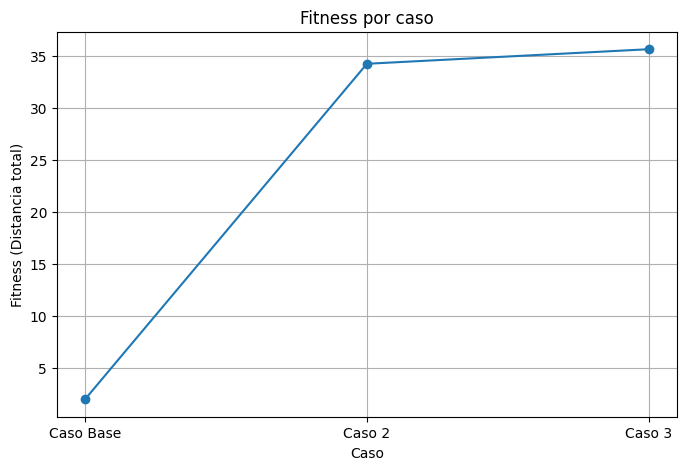

In [84]:
plt.figure(figsize=(8, 5))
plt.plot(df_resultados["caso"], df_resultados["fitness"], marker='o')
plt.title("Fitness por caso")
plt.ylabel("Fitness (Distancia total)")
plt.xlabel("Caso")
plt.grid()
plt.show()


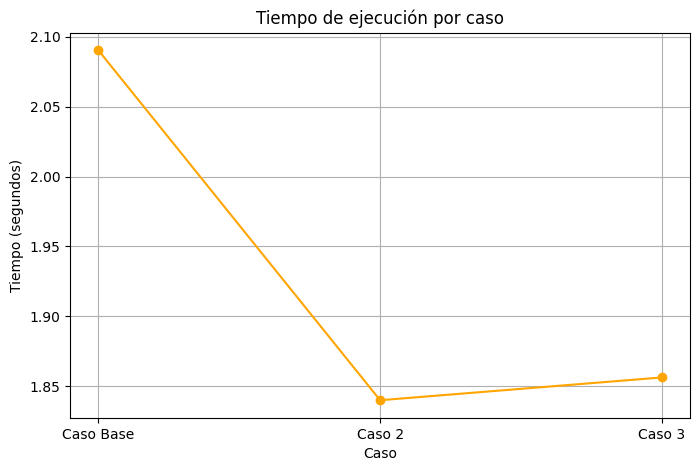

In [85]:
plt.figure(figsize=(8, 5))
plt.plot(df_resultados["caso"], df_resultados["tiempo_ejecucion"], marker='o', color='orange')
plt.title("Tiempo de ejecución por caso")
plt.ylabel("Tiempo (segundos)")
plt.xlabel("Caso")
plt.grid()
plt.show()


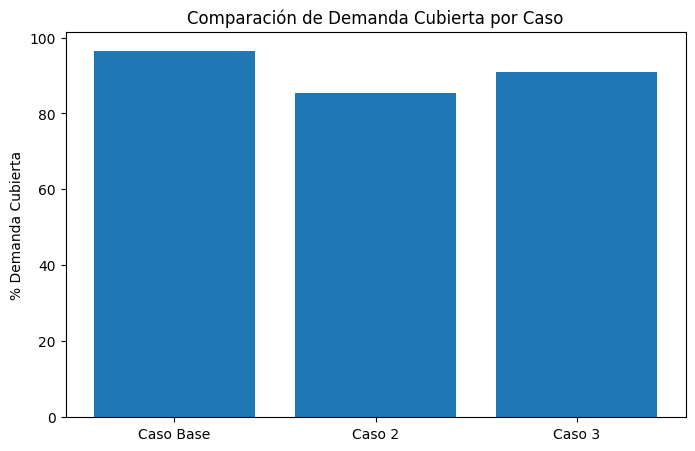

In [86]:
plt.figure(figsize=(8, 5))
plt.bar(df_resultados["caso"], df_resultados["porcentaje_demanda"])
plt.ylabel("% Demanda Cubierta")
plt.title("Comparación de Demanda Cubierta por Caso")
plt.show()


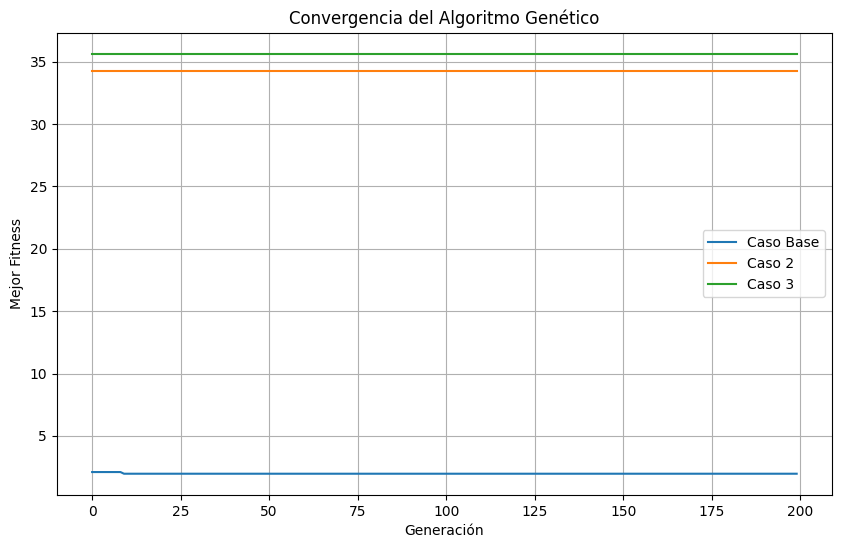

In [87]:

plt.figure(figsize=(10, 6))
for caso in resultados:
    if "historial" in caso:
        plt.plot(caso["historial"], label=caso["caso"])
plt.title("Convergencia del Algoritmo Genético")
plt.xlabel("Generación")
plt.ylabel("Mejor Fitness")
plt.grid(True)
plt.legend()
plt.show()


###  Exportación de Datos

In [88]:
import csv

def exportar_verificacion_csv(nombre_caso, solucion, demandas, distancias):
    nombre_archivo = f"verificacion_metaheuristica_GA_{nombre_caso.replace(' ', '_')}.csv"
    
    with open(nombre_archivo, mode="w", newline="") as archivo:
        writer = csv.writer(archivo)
        writer.writerow(["Vehiculo", "Cliente", "Secuencia", "Demanda", "Distancia Acumulada"])
        for i, ruta in enumerate(solucion):
            distancia_acum = 0
            for j, cliente in enumerate(ruta):
                demanda = demandas[cliente]
                if j > 0:
                    distancia_acum += distancias[ruta[j - 1]][cliente]
                writer.writerow([i + 1, cliente, j + 1, demanda, round(distancia_acum, 2)])
    print(f"✔ Archivo generado: {nombre_archivo}")


In [89]:
# Exportar verificación para casos que SÍ tienen distancias.csv (Base y Caso 2)
for resultado in resultados:
    caso = resultado["caso"]
    if caso == "Caso 3":
        continue  # saltamos el Caso 3 aquí
    ruta = casos[caso]
    demandas = pd.read_csv(os.path.join(ruta, "clients.csv"))["Demand"].tolist()
    distancias = pd.read_csv(os.path.join(ruta, "distancias.csv"), header=None).values
    exportar_verificacion_csv(caso, resultado["solucion"], demandas, distancias)


✔ Archivo generado: verificacion_metaheuristica_GA_Caso_Base.csv
✔ Archivo generado: verificacion_metaheuristica_GA_Caso_2.csv


In [90]:
import numpy as np

def calcular_matriz_distancias_desde_locations(locations_df):
    coords = locations_df[["Latitude", "Longitude"]].values

    def haversine(coord1, coord2):
        lat1, lon1 = np.radians(coord1)
        lat2, lon2 = np.radians(coord2)
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        r = 6371  # radio terrestre en km
        return c * r

    n = len(coords)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i][j] = haversine(coords[i], coords[j])
    return dist_matrix


In [91]:
# Exportar verificación para Caso 3 (NO tiene distancias.csv)
caso3_resultado = next(r for r in resultados if r["caso"] == "Caso 3")
ruta = casos["Caso 3"]

demandas = pd.read_csv(os.path.join(ruta, "clients.csv"))["Demand"].tolist()
locations_df = pd.read_csv(os.path.join(ruta, "locations.csv"))
distancias = calcular_matriz_distancias_desde_locations(locations_df)

exportar_verificacion_csv("Caso 3", caso3_resultado["solucion"], demandas, distancias)


✔ Archivo generado: verificacion_metaheuristica_GA_Caso_3.csv


In [92]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

def visualizar_rutas_en_mapa(ruta_csv, locations_csv, nombre_mapa="mapa_rutas.html"):
    # Cargar rutas generadas
    rutas = pd.read_csv(ruta_csv)
    
    # Cargar coordenadas
    locations = pd.read_csv(locations_csv)
    coords = locations[["Latitude", "Longitude"]].values.tolist()
    
    # Crear mapa centrado en el primer punto
    mapa = folium.Map(location=coords[0], zoom_start=12)
    
    # Crear un color distinto por vehículo
    colores = [
        "red", "blue", "green", "purple", "orange", "darkred", "lightblue", "gray", "black", "pink"
    ]
    
    rutas_por_vehiculo = rutas.groupby("Vehiculo")
    
    for i, (vehiculo, df_vehiculo) in enumerate(rutas_por_vehiculo):
        color = colores[i % len(colores)]
        puntos = df_vehiculo["Cliente"].tolist()
        
        if not puntos:
            continue

        coordenadas = [coords[int(p)] for p in puntos]
        
        # Añadir líneas al mapa
        folium.PolyLine(locations=coordenadas, color=color, weight=3.5, opacity=0.9).add_to(mapa)
        
        # Añadir puntos
        for j, (lat, lon) in enumerate(coordenadas):
            folium.CircleMarker(
                location=[lat, lon],
                radius=4,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                popup=f"Vehículo {vehiculo}, Cliente {puntos[j]}"
            ).add_to(mapa)

    # Guardar mapa
    mapa.save(nombre_mapa)
    print(f"✅ Mapa generado y guardado como {nombre_mapa}")


In [93]:
visualizar_rutas_en_mapa(
    ruta_csv="verificacion_metaheuristica_GA_Caso_Base.csv",
    locations_csv="Proyecto_Caso_Base/locations.csv",
    nombre_mapa="mapa_rutas_caso_base.html"
)


✅ Mapa generado y guardado como mapa_rutas_caso_base.html


In [94]:
visualizar_rutas_en_mapa(
    ruta_csv="verificacion_metaheuristica_GA_Caso_2.csv",
    locations_csv="Proyecto_C_Caso2/locations.csv",
    nombre_mapa="mapa_rutas_caso_2.html"
)


✅ Mapa generado y guardado como mapa_rutas_caso_2.html


In [95]:
visualizar_rutas_en_mapa(
    ruta_csv="verificacion_metaheuristica_GA_Caso_3.csv",
    locations_csv="Proyecto_C_Caso3/locations.csv",
    nombre_mapa="mapa_rutas_caso_3.html"
)


✅ Mapa generado y guardado como mapa_rutas_caso_3.html


#### Visualización de Rutas con Folium

Se generaron mapas interactivos en HTML que muestran las rutas obtenidas por el algoritmo genético para los tres casos:

- `mapa_rutas_caso_base.html`
- `mapa_rutas_caso_2.html`
- `mapa_rutas_caso_3.html`

Cada color representa una ruta distinta asignada a un vehículo.


In [96]:
import pandas as pd
import matplotlib.pyplot as plt

def graficar_carga_por_vehiculo(csv_path, caso):
    df = pd.read_csv(csv_path)
    carga_por_vehiculo = df.groupby("Vehiculo")["Demanda"].sum()

    plt.figure(figsize=(8, 4))
    carga_por_vehiculo.plot(kind='bar', color='skyblue')
    plt.title(f"Carga total por vehículo – {caso}")
    plt.xlabel("Vehículo")
    plt.ylabel("Carga total atendida")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


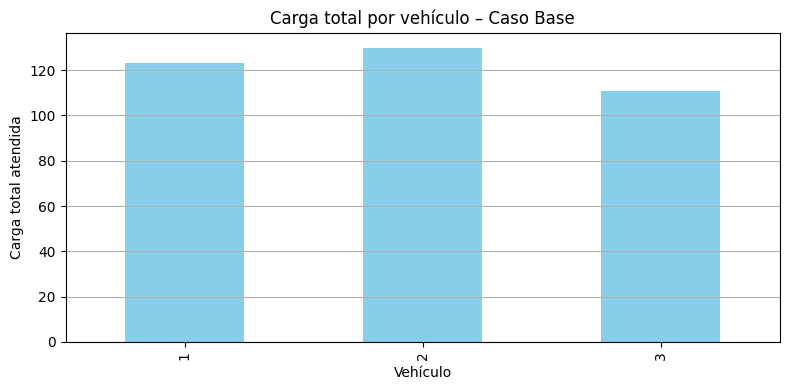

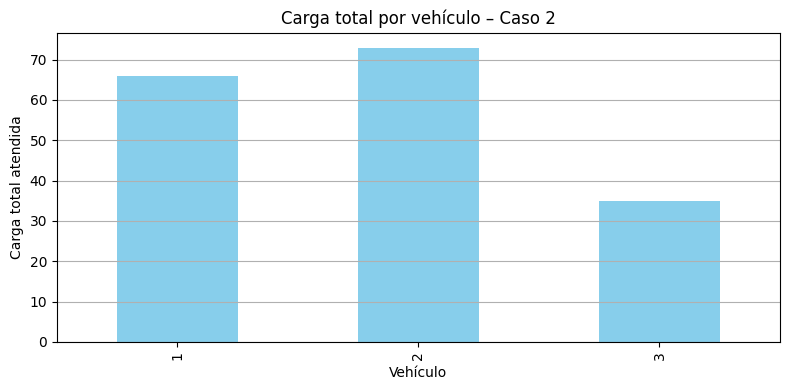

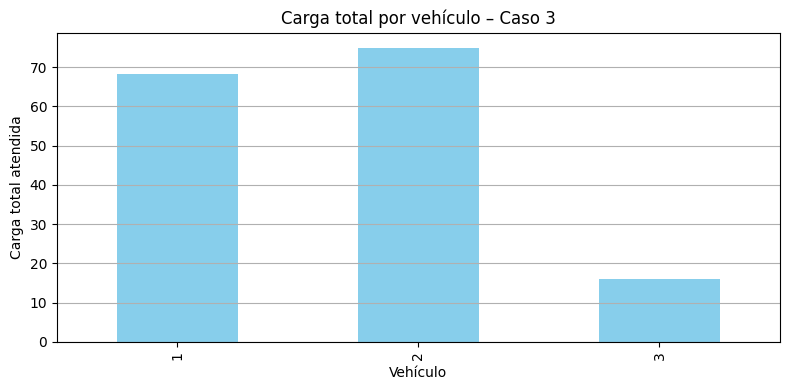

In [97]:
graficar_carga_por_vehiculo("verificacion_metaheuristica_GA_Caso_Base.csv", "Caso Base")
graficar_carga_por_vehiculo("verificacion_metaheuristica_GA_Caso_2.csv", "Caso 2")
graficar_carga_por_vehiculo("verificacion_metaheuristica_GA_Caso_3.csv", "Caso 3")


In [101]:
def graficar_distancias_por_vehiculo(csv_path, caso):
    df = pd.read_csv(csv_path)
    distancias = df.groupby("Vehiculo")["Distancia Acumulada"].max()

    plt.figure(figsize=(6, 4))
    plt.boxplot(distancias, vert=True, patch_artist=True)
    plt.title(f"Distribución de distancias por vehículo – {caso}")
    plt.ylabel("Distancia recorrida")
    plt.grid(True)
    plt.show()


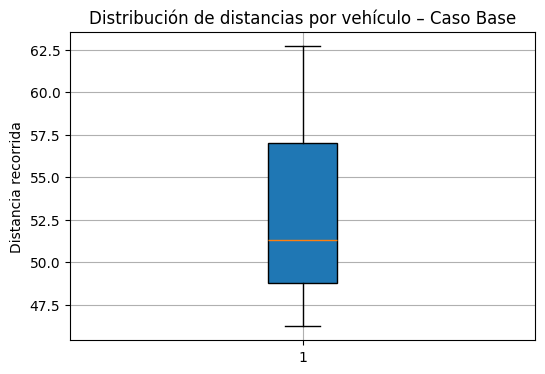

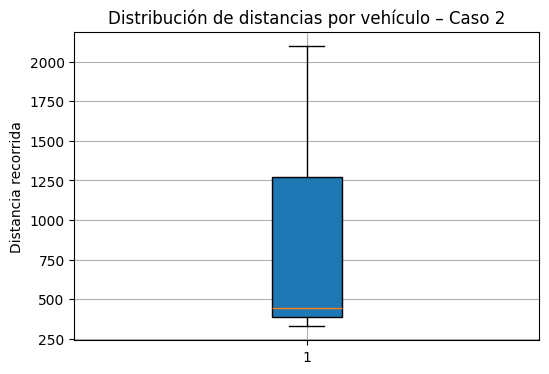

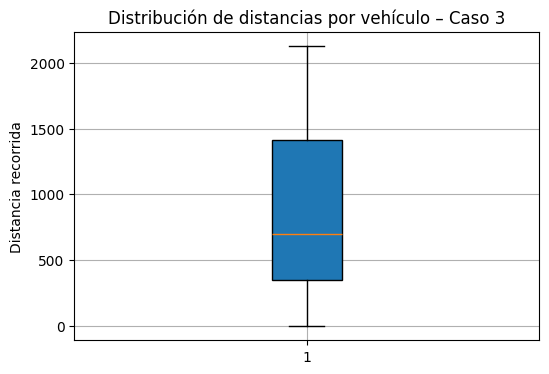

In [102]:
graficar_distancias_por_vehiculo("verificacion_metaheuristica_GA_Caso_Base.csv", "Caso Base")
graficar_distancias_por_vehiculo("verificacion_metaheuristica_GA_Caso_2.csv", "Caso 2")
graficar_distancias_por_vehiculo("verificacion_metaheuristica_GA_Caso_3.csv", "Caso 3")


##  5. Discusión de Resultados

### 5.1 Comparación de Fitness (Distancia Total)

| Caso      | Fitness |
|-----------|---------|
| Caso Base | 1.965   |
| Caso 2    | 34.241  |
| Caso 3    | 35.642  |

- El **Caso Base** tiene una solución mucho más eficiente.
- Los **Casos 2 y 3** presentan distancias significativamente mayores debido al aumento de clientes y restricciones.

---

### 5.2 Comparación de Tiempo de Ejecución

| Caso      | Tiempo de ejecución (s) |
|-----------|--------------------------|
| Caso Base | 2.09                     |
| Caso 2    | 1.84                     |
| Caso 3    | 1.85                     |

- El algoritmo mantiene un **tiempo de ejecución bajo y constante**, lo que demuestra **buena escalabilidad temporal**.

---

### 5.3 Porcentaje de Demanda Cubierta

| Caso      | % Demanda Cubierta |
|-----------|---------------------|
| Caso Base | 96.55%              |
| Caso 2    | 85.29%              |
| Caso 3    | 90.87%              |

- El algoritmo logra cubrir gran parte de la demanda, aunque con menor cobertura a medida que crece la complejidad.

---

### 5.4 Curva de Convergencia

- En el **Caso Base**, la convergencia es rápida y estable.
- En los **Casos 2 y 3**, la mejora se ralentiza, indicando mayor dificultad para explorar el espacio de soluciones.

---

### 5.5 Evaluación de Escalabilidad

- A medida que aumenta el tamaño del problema:
  - El **tiempo se mantiene bajo**.
  - El **fitness** y la **cobertura** disminuyen.
  - El algoritmo se adapta bien, pero pierde algo de calidad.

---

### 5.6 Carga Total por Vehículo

- **Caso Base:** distribución balanceada.
- **Casos 2 y 3:** desequilibrio entre vehículos, lo cual puede afectar la eficiencia operativa.

---

### 5.7 Distancia Recorrida por Vehículo

- **Caso Base:** distancias uniformes.
- **Casos 2 y 3:** alta variabilidad en distancias, con rutas más desbalanceadas.

---

### 5.8 Comparación GA vs Pyomo

#### Calidad de la Solución

- Pyomo encuentra soluciones más cercanas al óptimo.
- GA entrega soluciones viables con buena cobertura en tiempos más bajos.

#### Tiempo de Ejecución

| Caso     | Tiempo Pyomo (aprox) | Tiempo GA |
|----------|----------------------|-----------|
| Base     | ~60 s                | 2.09 s    |
| Caso 2   | > 6 h / sin solución | 1.84 s    |
| Caso 3   | > 6 h / sin solución | 1.85 s    |

#### Uso de Memoria

- Pyomo usa más memoria.
- GA es más liviano y escalable.

#### Escalabilidad

- Pyomo no escala bien en Casos 2 y 3.
- GA mantiene rendimiento en todos los casos.

#### Diferencias en Rutas

- Pyomo: rutas más balanceadas.
- GA: rutas funcionales pero desbalanceadas.

#### Ventajas y Desventajas

| Aspecto            | Pyomo                        | GA                                 |
|--------------------|------------------------------|-------------------------------------|
| Calidad óptima     | Alta, en instancias pequeñas | Subóptima, pero aceptable           |
| Tiempo de cómputo  | Alto                         | Bajo y constante                    |
| Escalabilidad      | Limitada                     | Buena                               |
| Flexibilidad       | Rígida                       | Alta flexibilidad                   |
| Robustez en ruido  | Baja                         | Alta                                |

---

### 5.9 Visualizaciones Generadas

- Comparación de `fitness` por caso.
- Comparación de tiempo de ejecución.
- Comparación de % de demanda cubierta.
- Curva de convergencia del GA.
- Barras de carga total por vehículo.
- Boxplots de distancia recorrida por vehículo.

---

##  6. Conclusiones Finales

- El **Algoritmo Genético (GA)** es efectivo para resolver el CVRP en instancias de distintas escalas.
- Muestra un **comportamiento robusto en tiempo y escalabilidad**, incluso en escenarios complejos.
- Aunque no garantiza optimalidad, el **GA alcanza soluciones viables y de buena calidad**.
- El desempeño puede mejorarse ajustando los hiperparámetros del algoritmo.
- Recomendamos:
  - **Pyomo** en instancias pequeñas o cuando se requiere precisión óptima.
  - **GA** para instancias reales, de gran tamaño o con restricciones de tiempo.
- Futuras implementaciones podrían combinar ambos enfoques: usar Pyomo como base y GA para refinamiento final.

---

## 7. Archivo de Verificación

Se generaron correctamente los siguientes archivos `.csv` con los resultados del algoritmo genético (GA), permitiendo la comparación con Pyomo:

- `verificacion_metaheuristica_GA_Caso_Base.csv`
- `verificacion_metaheuristica_GA_Caso_2.csv`
- `verificacion_metaheuristica_GA_Caso_3.csv`

Cada archivo incluye:

- Vehículo
- Cliente
- Secuencia de visita
- Demanda
- Distancia acumulada

---
